In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pywr_drb_node_data import nhm_site_matches, obs_pub_site_matches

pywrdrb_dir = ""


In [2]:
Q_hru = pd.read_csv("./outputs/csv/drb_hru_outflow_mgd.csv", index_col=0, parse_dates=True)
Q_seg = pd.read_csv("./outputs/csv/drb_seg_outflow_mgd.csv", index_col=0, parse_dates=True)

nhm_gage_ids = pd.read_csv("./outputs/drb_nhm_gage_segment_ids.csv", index_col=0, dtype = str)
nhm_gage_ids.head(1)

,gage_id,nhm_segment_id
$id,,
525,01411456,3560


In [6]:
for node, sites in obs_pub_site_matches.items():
    if sites:
        for s in sites:
            if s not in nhm_gage_ids.gage_id.values:
                print(f'Lacking site {s} for {node}')

Lacking site 01435000 for neversink


In [7]:
nhm_cannonsville_inflows = ['1559', '1557']
nhm_cannonsville_hru = ['1562']

pepacton_inflows = ['1440', '1441', '1443', '1437']
pepacton_hru = ['1449']

In [9]:
hru_flow_id = pepacton_hru 
nhm_gauge_inflows = pepacton_inflows

c = Q_seg.loc[:, hru_flow_id].values.flatten() / Q_seg.loc[:, nhm_gauge_inflows].sum(axis=1).values
scaling = pd.DataFrame(c, index = Q_seg.index, columns=['Scaling coefficient'])
np.mean(c)

1.7376194378683238

Text(0.5, 0, 'Date')

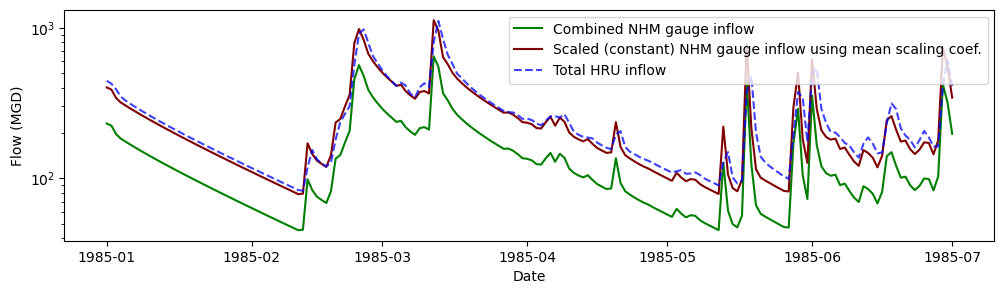

In [11]:
start = '1985-01-01'
end = '1985-07-01'

fig, ax = plt.subplots(figsize = (12,3))
ys = scaling.loc[start:end, :]
xs = scaling.loc[start:end, :].index
ax.plot(xs, Q_seg.loc[start:end, nhm_gauge_inflows].sum(axis=1).values, label = 'Combined NHM gauge inflow', color = 'green')
ax.plot(xs, scaling.mean().values*Q_seg.loc[start:end, nhm_gauge_inflows].sum(axis=1).values, label = 'Scaled (constant) NHM gauge inflow using mean scaling coef.', color = 'maroon')

ax.plot(xs, Q_seg.loc[start:end, hru_flow_id].values, label = 'Total HRU inflow', color = 'blue', alpha = 0.75, ls='dashed')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('Flow (MGD)')
plt.xlabel('Date')


In [12]:
scaling.mean()

Scaling coefficient    1.737619
dtype: float64

Text(0.5, 0, 'Date')

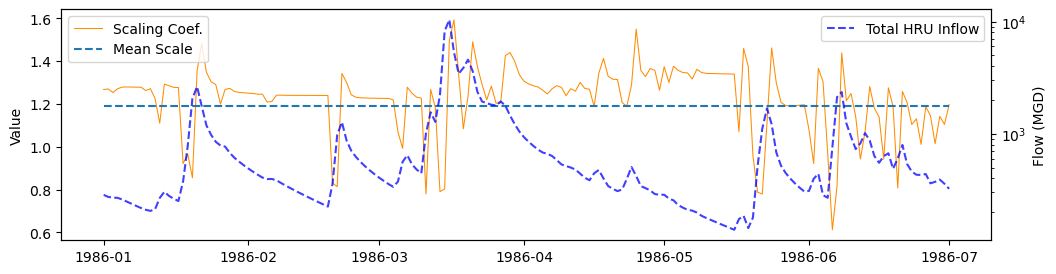

In [35]:


fig, ax = plt.subplots(figsize = (12,3))
ys = scaling.loc[start:end, :]
xs = scaling.loc[start:end, :].index

ax.plot(xs, ys, lw=0.75, color = 'darkorange', label = 'Scaling Coef.')
ax.hlines(scaling.mean(), xmin = scaling.loc[start:end,:].index.min(),xmax = scaling.loc[start:end,:].index.max(), ls='dashed', label='Mean Scale')
plt.legend(loc='upper left')
plt.ylabel('Value')

ax2 = ax.twinx()
# diff = Q_seg.loc[start:end, nhm_cannonsville_hru].values.flatten() - Q_seg.loc[start:end, nhm_cannonsville_inflows].sum(axis=1).values.flatten()
# diff[diff<0] = 1
#ax2.plot(xs, diff, label = 'Difference', color = 'purple')
#ax2.plot(xs, Q_seg.loc[start:end, nhm_cannonsville_inflows].sum(axis=1).values, label = 'Mod. Gauge Inflow', color = 'maroon')
ax2.plot(xs, Q_seg.loc[start:end, nhm_cannonsville_hru].values, label = 'Total HRU Inflow', color = 'blue', alpha = 0.75, ls='dashed')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylabel('Flow (MGD)')
plt.xlabel('Date')


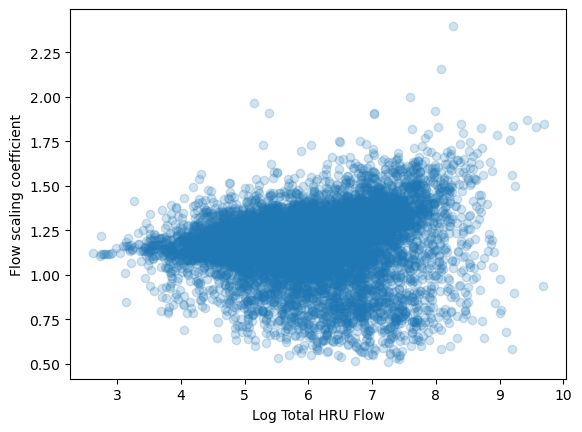

In [22]:
plt.scatter(np.log(Q_seg.loc[:, nhm_cannonsville_hru].values), scaling.loc[:, :], alpha=0.2)
plt.ylabel('Flow scaling coefficient')
plt.xlabel('Log Total HRU Flow')
plt.show()

In [23]:
np.corrcoef(np.log(Q_seg.loc[:, nhm_cannonsville_hru].values.flatten()), scaling.values.flatten())

array([[1.        , 0.13834695],
       [0.13834695, 1.        ]])